In [ ]:
# 9/17/24

# Let me begin by exploring the data.

In [1]:
# pip install requests beautifulsoup4 pandas seaborn matplotlib


In [11]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
import json
import os
from pandas import DataFrame, Series

import seaborn as sns

from itertools import combinations

from sklearn.linear_model import LinearRegression



In [3]:
# Read the Red Wine data
df = pd.read_csv('winequality-red.csv')

# Display the first 5 rows of the data
df


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [4]:
# Split the values in the column into separate columns
df_cleaned = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

# Rename the columns
df_cleaned.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Convert the columns to appropriate data types
df_cleaned = df_cleaned.astype({'fixed acidity': float, 'volatile acidity': float, 'citric acid': float, 'residual sugar': float, 'chlorides': float, 'free sulfur dioxide': float, 'total sulfur dioxide': float, 'density': float, 'pH': float, 'sulphates': float, 'alcohol': float, 'quality': int})

# Display the cleaned dataframe
df_cleaned


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# # Read the CSV file, ensuring it has no header (if it doesn't)
# df = pd.read_csv('winequality-red.csv', header=0)  # Assuming the file has headers; use header=None if no headers

# # Add an index to the DataFrame
# df.index = range(1, len(df) + 1)  # Creating a 1-based index

# # Display the DataFrame with the new index
# print(df)

In [10]:
# Now let me see which of the variables are most correlated with the quality of the wine.

correlation = df_cleaned.corr()['quality']
correlation = correlation.sort_values(ascending=False)
correlation


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [7]:
# None of the variables have a strong correlation with quality. 
# The highest correlation is with alcohol, which is 0.48. 
# This is a moderate correlation at best. 
# The other variables have weak correlations with quality.

# Let me try to visualize second order relationships between the variables and quality.


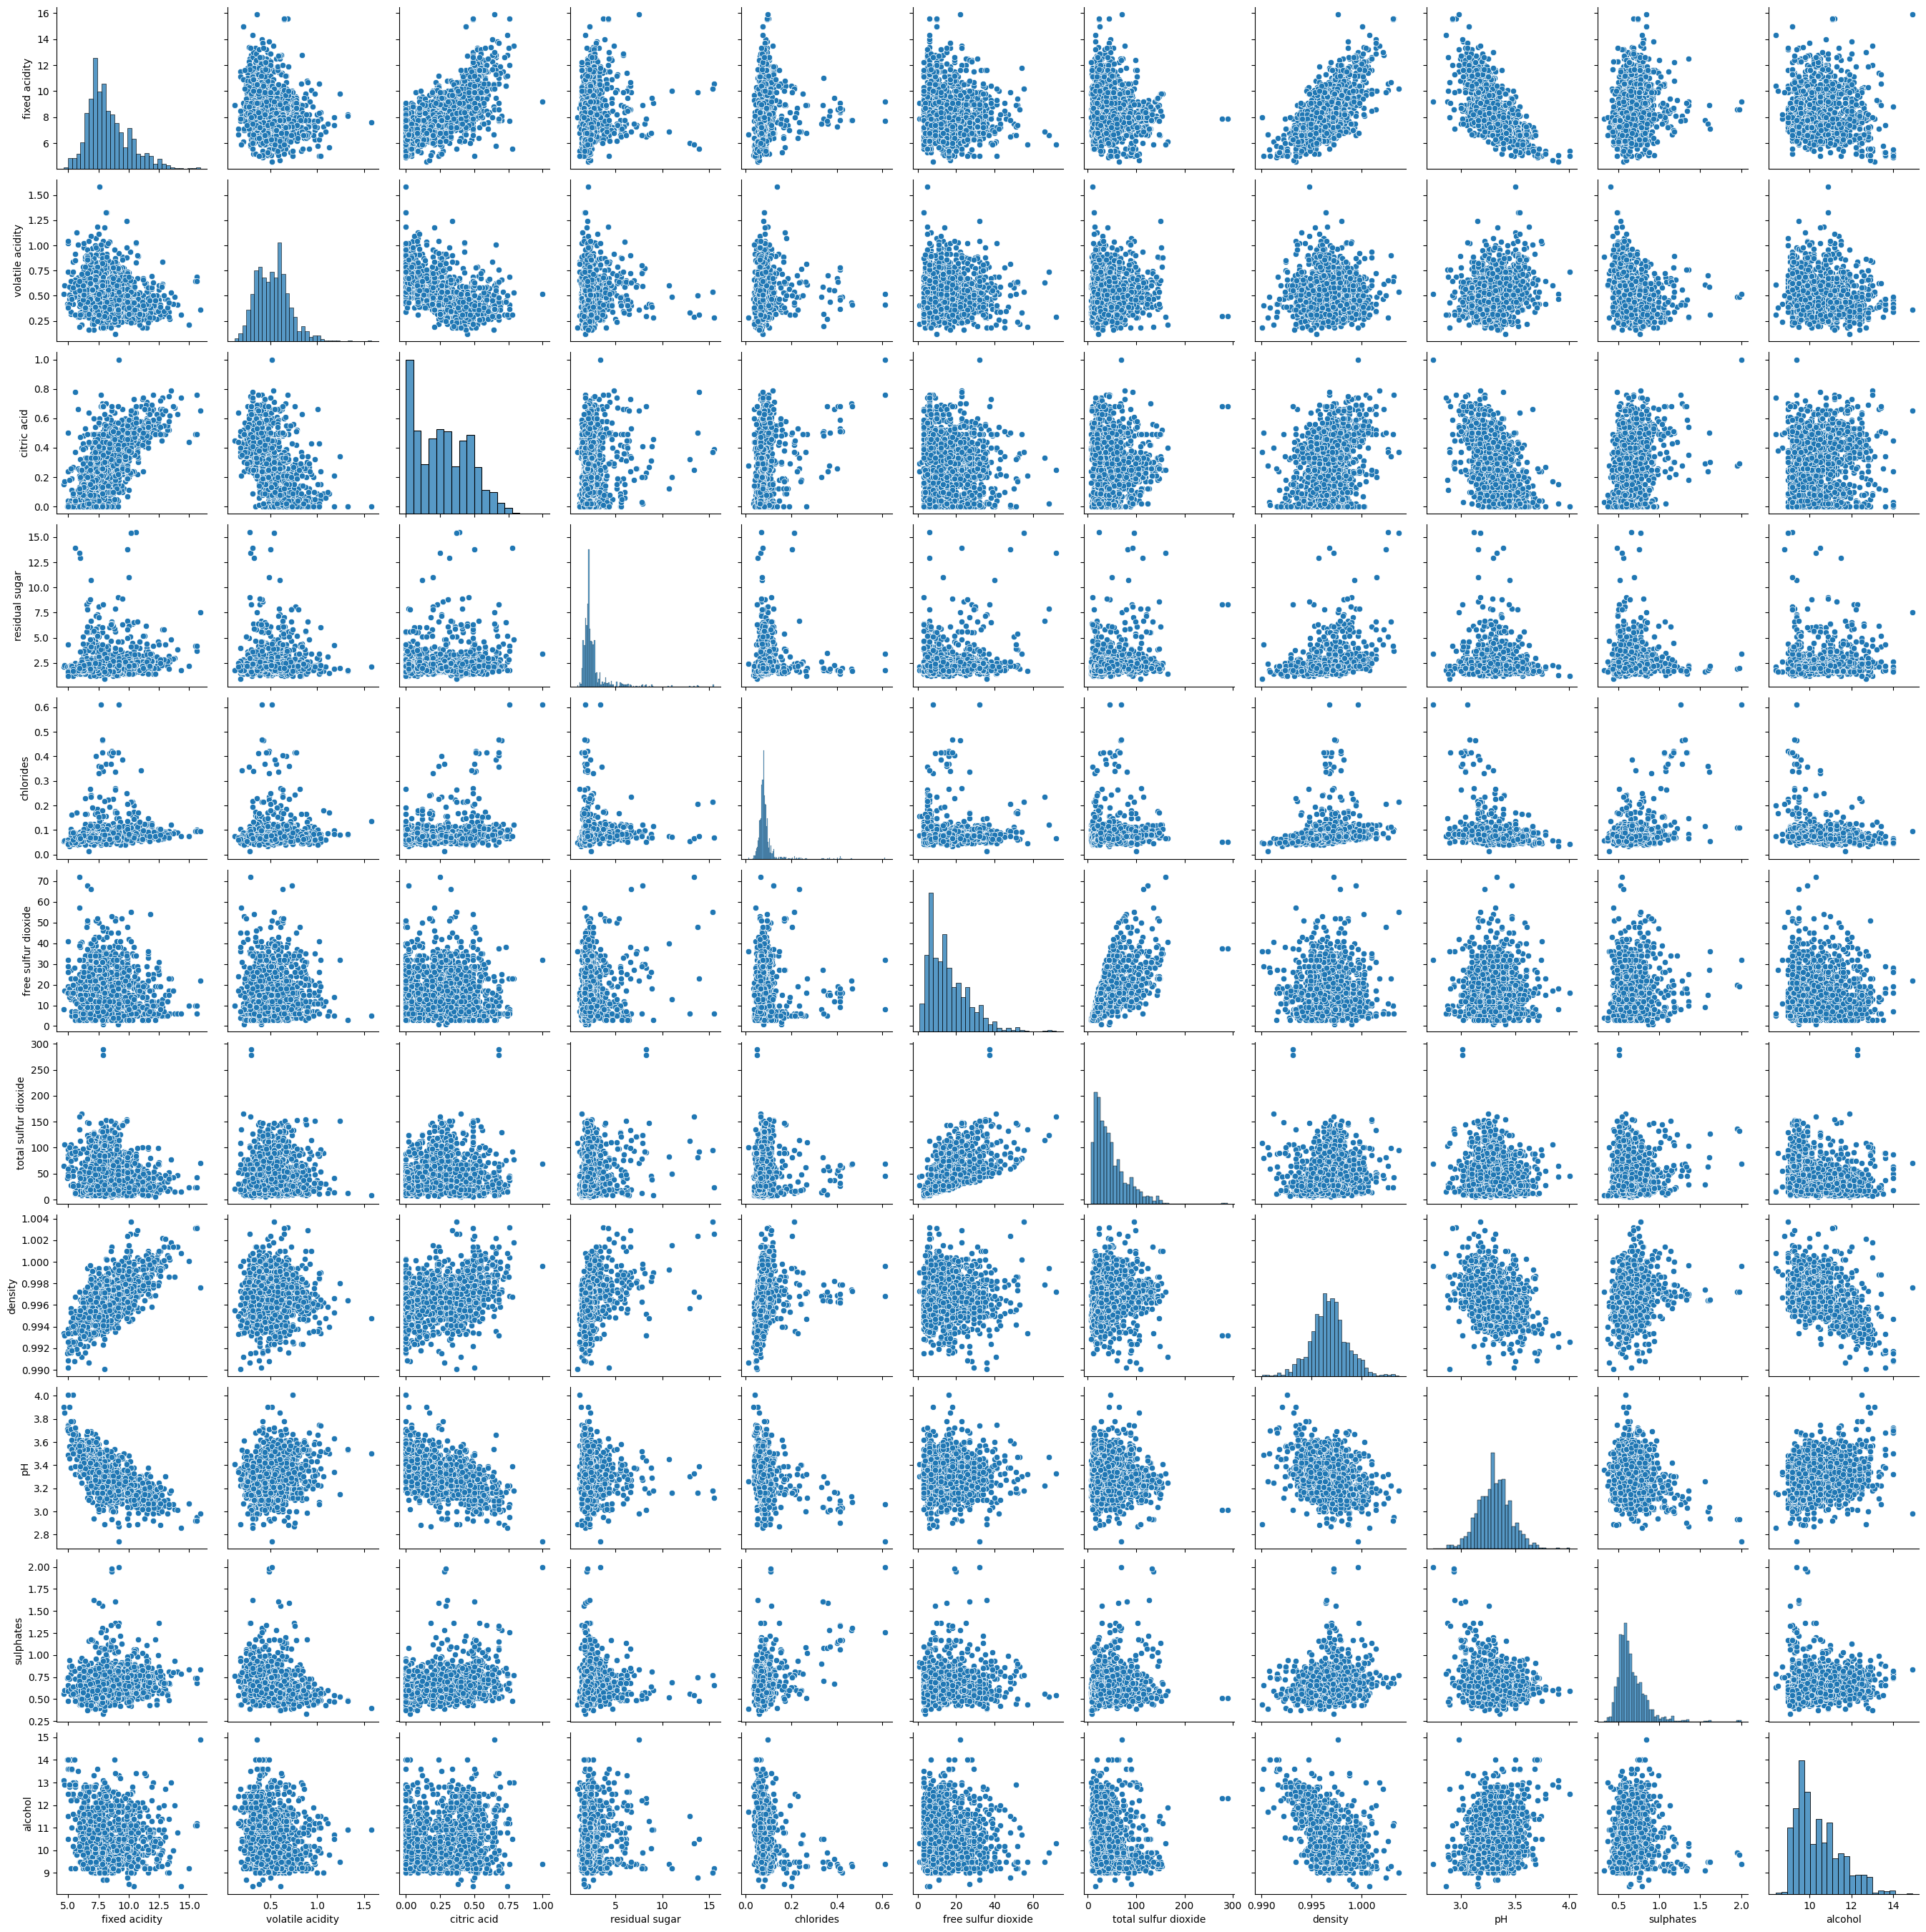

In [8]:
# I can use Seaborn's pairplot to visualize the relationships between the variables in the dataset.
# I may want to do this, but I don't think it's what I want here.
# I'd rather have a list of the correlations coefficients. 

# # Exclude the 'quality' column from the pairplot
# df_pairplot = df_cleaned.drop(columns=['quality'])

# # Create a pairplot
# sns.pairplot(df_pairplot)
# plt.show()




In [20]:
# Let me instead make a list of the 2nd order correlation coefficients.

# Here, I make another dataframe, called interaction_df, which has as its columns all of the 
# interactions between the columns of the original dataframe, excluding quality column.
# I then calculate the correlation of each of these columns with the quality column (very 
# similar to what I did above, but now with all the columns interacting with each other).

# Assume we want to find second-order correlations with column 'quality'
target_column = 'quality'

# Step 1: Create interaction terms (second-order relationships) dataframe
interaction_df = pd.DataFrame()

# Only create pairwise combinations for columns that are not the target column
for col1, col2 in combinations([col for col in df_cleaned.columns if col != target_column], 2):
    interaction_df[f'{col1}*{col2}'] = df_cleaned[col1] * df_cleaned[col2]

# Step 2: Calculate the correlations of these interaction terms with the target column
interaction_df[target_column] = df_cleaned[target_column]
correlations = interaction_df.corr()[target_column]

# Step 3: Drop the correlation of the target column with itself
correlations.drop(target_column, inplace=True)

pd.set_option('display.max_rows', None)

print("Correlations of second-order relationships with column 'quality':")
correlations.sort_values(ascending=False)



Correlations of second-order relationships with column 'quality':


density*alcohol                             0.477239
sulphates*alcohol                           0.412858
pH*alcohol                                  0.376588
fixed acidity*alcohol                       0.316477
citric acid*alcohol                         0.292002
pH*sulphates                                0.259544
density*sulphates                           0.249688
fixed acidity*sulphates                     0.248533
citric acid*sulphates                       0.242148
citric acid*pH                              0.228308
citric acid*density                         0.225650
fixed acidity*citric acid                   0.219599
citric acid*residual sugar                  0.167133
fixed acidity*pH                            0.125720
fixed acidity*density                       0.121874
residual sugar*sulphates                    0.112639
residual sugar*alcohol                      0.100201
citric acid*free sulfur dioxide             0.072022
fixed acidity*residual sugar                0.

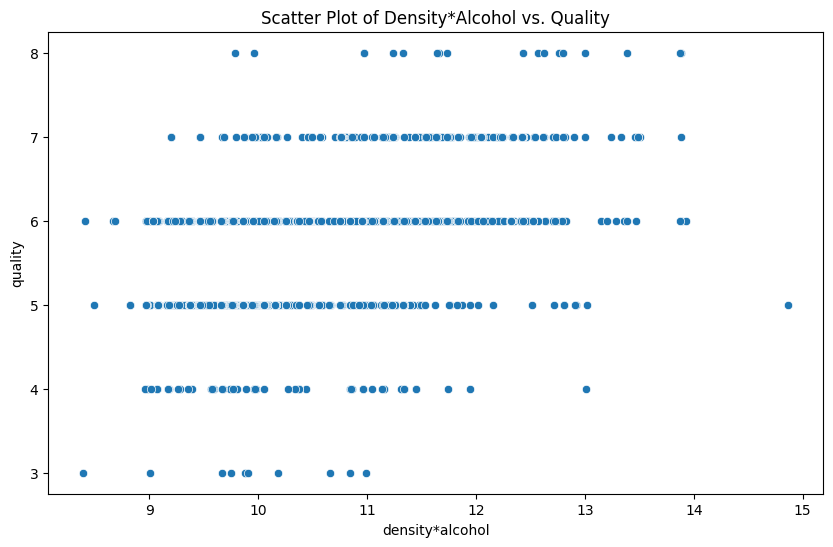

In [21]:
# The density*alcohol and sulphates*alcohol are the highest second order interactions
# with quality, at 0.48 and 0.41, respectively.

# Let me make scatterplots showing those interactions here.

# Create a scatter plot of 'density*alcohol' vs. 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=interaction_df, x='density*alcohol', y='quality')
plt.title('Scatter Plot of Density*Alcohol vs. Quality')
plt.show()


Slope: 0.3665109924690322
Intercept: 1.8286782940052935


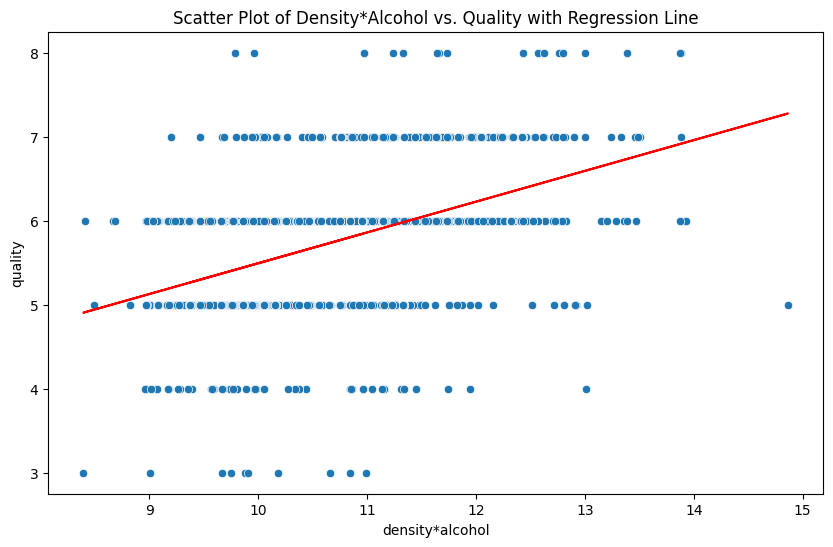

In [23]:
# Let's calculate the linear regression line for the relationship between 
# density*alcohol and quality.

# Extract the features and target variable
X = interaction_df[['density*alcohol']]  # X must be 2D (independent variable)
y = interaction_df['quality']  # y is 1D (dependent variable)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=interaction_df, x='density*alcohol', y='quality')

# Plot the regression line
plt.plot(interaction_df['density*alcohol'], slope * interaction_df['density*alcohol'] + intercept, color='red')

plt.title('Scatter Plot of Density*Alcohol vs. Quality with Regression Line')
plt.show()



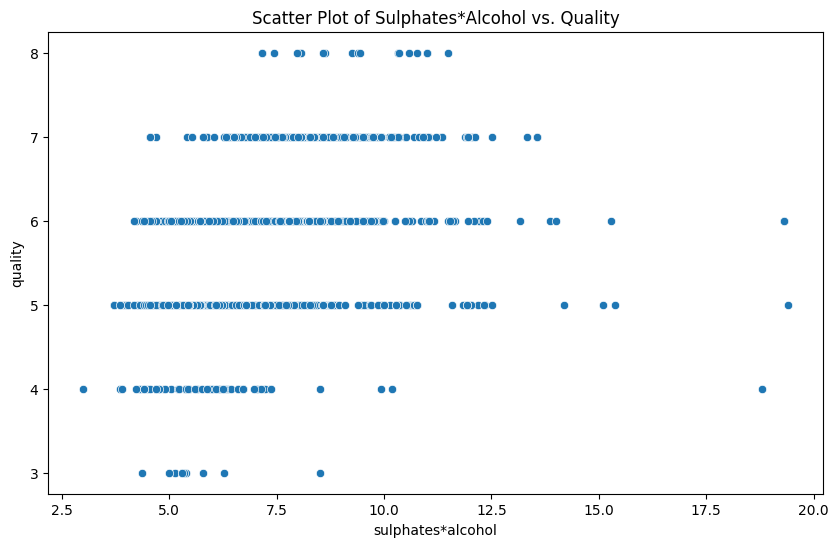

In [22]:
# Now let's do the same thing for the relationship between sulphates*alcohol and quality.
# Create a scatter plot of 'sulphates*alcohol' vs. 'quality'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=interaction_df, x='sulphates*alcohol', y='quality')
plt.title('Scatter Plot of Sulphates*Alcohol vs. Quality')
plt.show()


Slope: 0.17319517647854718
Intercept: 4.44499903691661


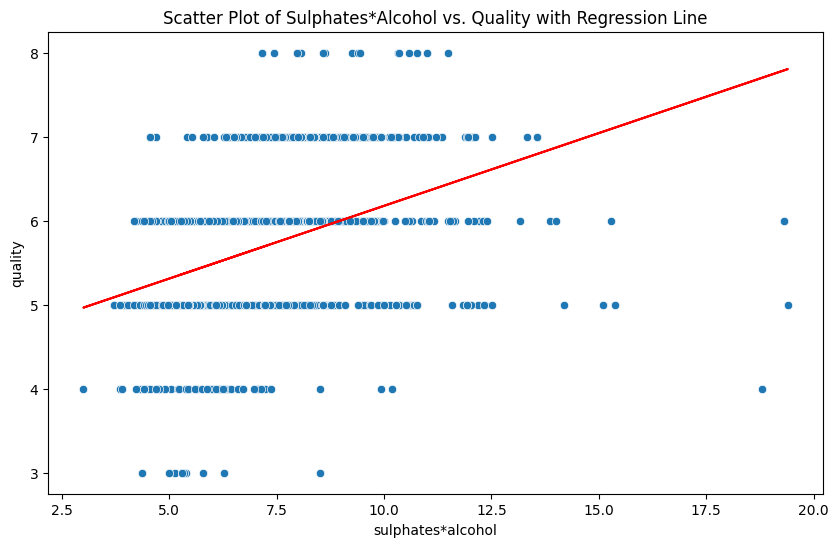

In [24]:
# Let's calculate the linear regression line for the relationship between 
# sulphates*alcohol and quality.

# Extract the features and target variable
X = interaction_df[['sulphates*alcohol']]  # X must be 2D (independent variable)
y = interaction_df['quality']  # y is 1D (dependent variable)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=interaction_df, x='sulphates*alcohol', y='quality')

# Plot the regression line
plt.plot(interaction_df['sulphates*alcohol'], slope * interaction_df['sulphates*alcohol'] + intercept, color='red')

plt.title('Scatter Plot of Sulphates*Alcohol vs. Quality with Regression Line')
plt.show()


In [ ]:
# So if I want to do simple linear regression but on second order interactions, 
# I can see that the density*alcohol and sulphates*alcohol interactions are the most
# correlated with quality.

# In other words, if I want to predict the quality of the wine, the density*alcohol and
# sulphates*alcohol interactions are the best variables to use. 